### Problem Statement
##  PeerLoanKart is an NBFC(Non-banking Financial Company)that facilitates peer-to-peer loan. it connects people who needs money(borrowers)with people who 
##  have money(investors).As an investor, you would want to invest in people who showed a profile of having a high probability of paying you back. you as  
## an "ML Expert" create a model that will help predict whether a borrower will pay the loan or not.
##  Objective: increase profit up to 20% as NpA will be reduced due to loan disbursal for only creditworthy borrowers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
loan = pd.read_csv("loan_data.csv")

In [3]:
loan.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [4]:
loan.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [6]:
loan.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

## create a histogram of two FICO distributions ontop of each other, one for each credit.policy outcome.

Text(0.5, 0, 'FICO')

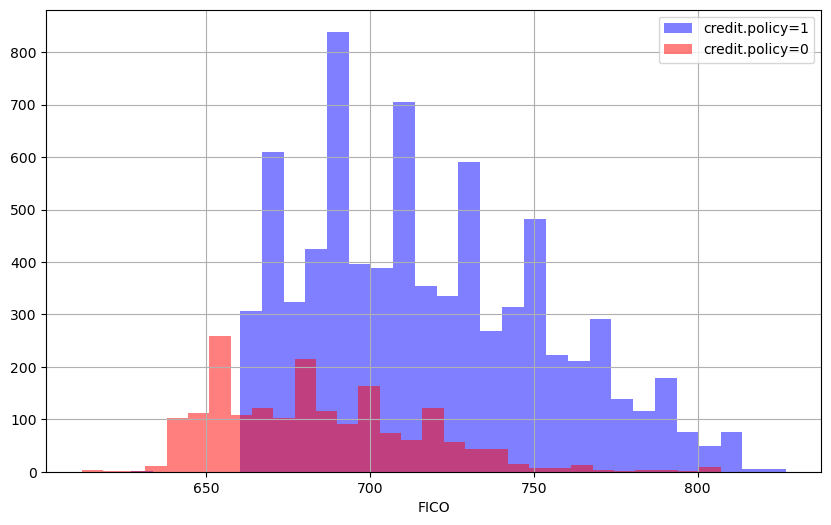

In [7]:
plt.figure(figsize=(10,6))
loan[loan['credit.policy']==1] ['fico'].hist(alpha=0.5,color='blue',
bins=30,label='credit.policy=1')
loan[loan['credit.policy']==0] ['fico'].hist(alpha=0.5,color='red',
bins=30,label='credit.policy=0')
plt.legend()
plt.xlabel('FICO')

## create a similar figure;select the not.fully.paid column

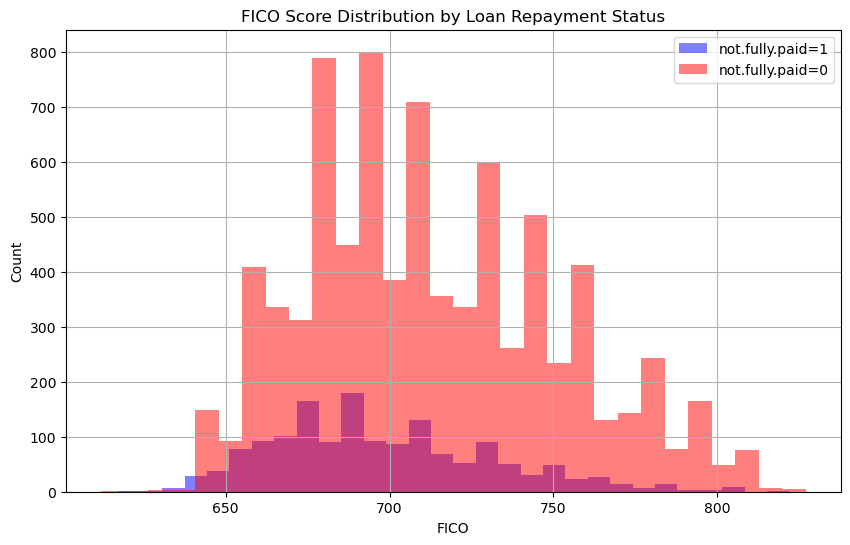

In [8]:
import matplotlib.pyplot as plt  

plt.figure(figsize=(10, 6))  

# Plot FICO scores for both classes
loan[loan['not.fully.paid'] == 1]['fico'].hist(alpha=0.5, color='blue', bins=30, label='not.fully.paid=1')
loan[loan['not.fully.paid'] == 0]['fico'].hist(alpha=0.5, color='red', bins=30, label='not.fully.paid=0')

# Add labels and legend
plt.legend()
plt.xlabel('FICO')
plt.ylabel('Count')
plt.title('FICO Score Distribution by Loan Repayment Status')

# Show the plot
plt.show()


## create a countplot using seaborn showing the count of loans by purpose,with the hue defined by not.fully.paid.

<Axes: xlabel='purpose', ylabel='count'>

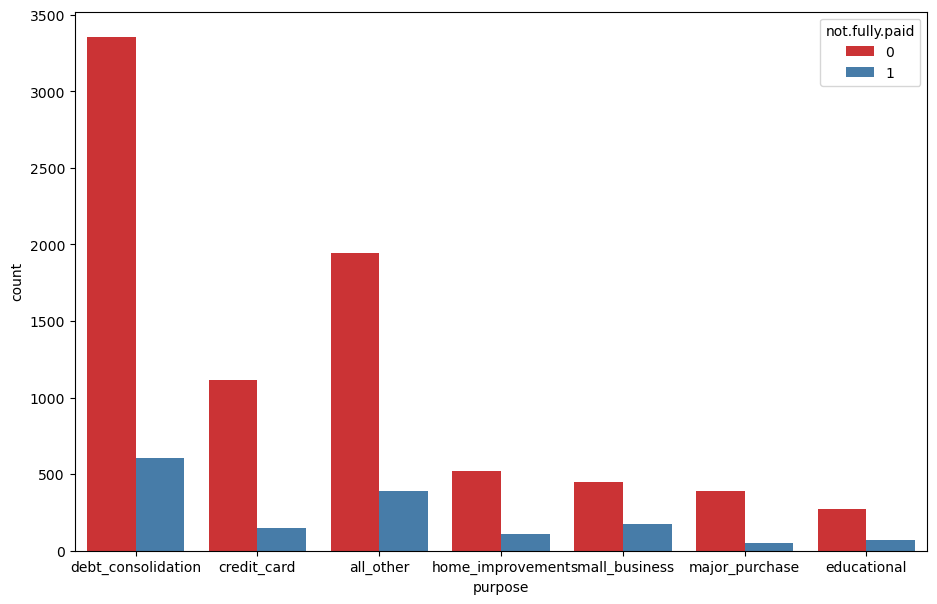

In [9]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loan,palette='Set1')

In [10]:
loan["purpose"].unique()


array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [11]:
loan = pd.get_dummies(loan, columns=["purpose"], drop_first=True)


In [12]:
X = loan.drop('not.fully.paid',axis=1)
y = loan['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

### Training Decision Tree Model

In [13]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Evaluating Decision Tree: create prediction from the test set,and create a classification report and confusion matrix.

In [14]:
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      2431
           1       0.20      0.24      0.22       443

    accuracy                           0.74      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.76      0.74      0.75      2874



## Confusion Matrix

In [15]:
print(confusion_matrix(y_test,predictions))

[[2007  424]
 [ 335  108]]


## To improve the decisionTreeClassifier we will have to TUNE its Hyperparameter using GridSearchCV

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10, 15, None],  # Limits tree depth
    'min_samples_split': [2, 5, 10],  # Minimum samples needed to split a node
    'min_samples_leaf': [1, 2, 5, 10],  # Minimum samples per leaf
    'criterion': ['gini', 'entropy']  # Split method
}

# Initialize DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=42)

# GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Train new model with best parameters
best_dtree = DecisionTreeClassifier(**grid_search.best_params_, random_state=42)
best_dtree.fit(X_train, y_train)

# Predict using the tuned model
best_predictions = best_dtree.predict(X_test)

# Evaluate performance
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:\n", confusion_matrix(y_test, best_predictions))
print("\nClassification Report:\n", classification_report(y_test, best_predictions))


Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Confusion Matrix:
 [[1990  441]
 [ 342  101]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



##  The model have not improved hence we use the RandomForest classifier

## Training Random Forest Model

In [17]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

## Evaluating Random Forest Model

In [18]:
predictions = rfc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.62      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.73      0.51      0.48      2874
weighted avg       0.81      0.85      0.78      2874



### Printing the confusion matrix 

In [19]:
print(confusion_matrix(y_test,predictions))

[[2426    5]
 [ 435    8]]


In [20]:
rfc = RandomForestClassifier(n_estimators=600, class_weight="balanced")


In [21]:
!pip install --upgrade joblib


Defaulting to user installation because normal site-packages is not writeable


In [22]:
!pip install xgboost


Defaulting to user installation because normal site-packages is not writeable


In [23]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix


In [24]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)


C:\Users\VIZECH\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [15:53:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [25]:
xgb_predictions = xgb_model.predict(X_test)

# Print Evaluation Metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_predictions))
print("\nClassification Report:\n", classification_report(y_test, xgb_predictions))


Confusion Matrix:
 [[2363   68]
 [ 409   34]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91      2431
           1       0.33      0.08      0.12       443

    accuracy                           0.83      2874
   macro avg       0.59      0.52      0.52      2874
weighted avg       0.77      0.83      0.79      2874



##  Hyperparameter Tuning for XGBoost

In [26]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Train the model with best parameters
best_xgb = xgb.XGBClassifier(**grid_search.best_params_, use_label_encoder=False, eval_metric='logloss', random_state=42)
best_xgb.fit(X_train, y_train)

# Make predictions
best_xgb_predictions = best_xgb.predict(X_test)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, best_xgb_predictions))
print("\nClassification Report:\n", classification_report(y_test, best_xgb_predictions))


C:\Users\VIZECH\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [15:58:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'colsample_bytree': 1, 'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.8}


C:\Users\VIZECH\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [15:58:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix:
 [[2298  133]
 [ 391   52]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90      2431
           1       0.28      0.12      0.17       443

    accuracy                           0.82      2874
   macro avg       0.57      0.53      0.53      2874
weighted avg       0.77      0.82      0.78      2874



In [27]:
import joblib

# Save the trained XGBoost model
joblib.dump(xgb_model, 'xgb_model.pkl')


['xgb_model.pkl']

In [28]:
import joblib

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)  # Retrain
joblib.dump(xgb_model, 'xgb_model.pkl')  # Save properly


C:\Users\VIZECH\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [15:58:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


['xgb_model.pkl']

In [29]:
import joblib

# Save training feature names
joblib.dump(X_train.columns.tolist(), 'training_columns.pkl')


['training_columns.pkl']